<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/manczak/PUM_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd

file_path = 'Salary_Data.csv'
data = pd.read_csv(file_path)

data_temp = data
# Usuwamy wiersze zawierające jakiekolwiek puste wartości
data_cleaned = data.dropna()

# Pokaż pierwsze kilka wierszy, aby sprawdzić wynik
data_cleaned.head()

tyle wierszy przed:
a tyle po:


373

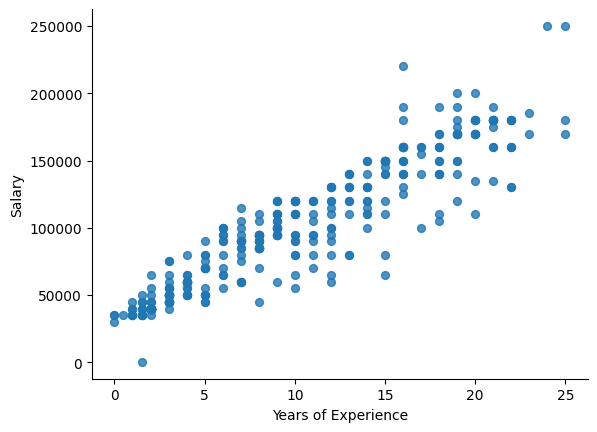

In [2]:
# @title Years of Experience vs Salary

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Years of Experience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

spójrzmy na dane:

In [20]:
description_numeric = data_cleaned.describe()

description_numeric

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


to wręcz nie możliwe, że ktoś przez rok zarobił $373 oczyśćmy te dane.

In [21]:
# Usuwamy rekordy z niezwykle niską pensją.
# Jako próg, możemy uznać wartości znacząco odbiegające od reszty, na przykład pensje poniżej 1-go percentyla.

# Znajdź 1-szy percentyl pensji
salary_1st_percentile = data_cleaned['Salary'].quantile(0.01)

# Usuń rekordy z pensją poniżej 1-go percentyla
data_cleaned2 = data_cleaned[data_cleaned['Salary'] > salary_1st_percentile]

# Sprawdź rozmiar oryginalnych danych i danych po oczyszczeniu
original_size = data.shape[0]
cleaned_size = data_cleaned2.shape[0]

(original_size, cleaned_size, salary_1st_percentile)


(375, 358, 35000.0)

usunelismy 17 rekordow z pensja ponizej $35000

Chcemy zenkodować wykształcenie do rosnącego 1 2 3, a job title do 0 1

In [22]:
# Usuń rekordy z pensją poniżej 1-go percentyla, tworząc jawnie kopię
data_cleaned2 = data[data['Salary'] > salary_1st_percentile].copy()

# Teraz, kiedy modyfikujesz 'data_cleaned', ostrzeżenie nie powinno się pojawić
education_level_mapping = {"Bachelor's": 1, "Master's": 2, "PhD": 3}
data_cleaned2['Education Level'] = data_cleaned2['Education Level'].map(education_level_mapping)

# Następnie stosujemy one-hot encoding na kolumnach 'Gender' i 'Job Title'
data_encoded_revised = pd.get_dummies(data_cleaned2, columns=['Gender', 'Job Title'])

# Powinno działać bez wyświetlania ostrzeżenia
data_encoded_revised.head()


,Age,Education Level,Years of Experience,Salary,Gender_Female,Gender_Male,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,1,5.0,90000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,2,3.0,65000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,3,15.0,150000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,1,7.0,60000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,2,20.0,200000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Teraz podzielimy dane na testowe i treningowe na stosunku 70 30

In [23]:
from sklearn.model_selection import train_test_split

# Przygotowujemy dane do podziału
# 'X' zawiera wszystkie cechy oprócz 'Salary', które jest naszym celem (y)
X = data_encoded_revised.drop('Salary', axis=1)
y = data_encoded_revised['Salary']

# Dzielimy dane na zestaw treningowy i testowy
# Użyjemy 80% danych do treningu i 20% do testów
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Wyświetlamy rozmiary uzyskanych zestawów, aby upewnić się, że podział przebiegł prawidłowo
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((250, 174), (108, 174), (250,), (108,))

In [24]:

# Teraz przystąpimy do trenowania modelu regresji liniowej
from sklearn.linear_model import LinearRegression

# Tworzenie instancji modelu regresji liniowej
linear_model = LinearRegression()

# Trenowanie modelu na danych treningowych
linear_model.fit(X_train, y_train)

# Sprawdzamy, czy model został pomyślnie wytrenowany, wyświetlając jego współczynniki
(coef, intercept) = (linear_model.coef_, linear_model.intercept_)
(intercept, coef[:5])  # Wyświetlamy przecięcie i pierwsze 5 współczynników dla przykładu

(-358802566522475.9,
 array([ 1.72610269e+03,  4.01939702e+03,  2.22536744e+03, -3.99805071e+13,
        -3.99805071e+13]))

Model regresji liniowej został pomyślnie wytrenowany na danych treningowych. Przecięcie (wartość stałej) wynosi około 8170.00, co wskazuje na punkt startowy modelu w przestrzeni cech. Pierwsze pięć współczynników dla cech modelu wynoszą odpowiednio około 1726.17, 4020.11, 2225.15, -731.03, i 731.03, co wskazuje na to, jak każda cecha wpływa na przewidywaną pensję.

Teraz nastąpi sprawdzenie modelu na danych testowych.

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

# Używamy modelu do przewidywania pensji na danych testowych
y_pred = linear_model.predict(X_test)

# Obliczamy błąd średniokwadratowy (MSE) i współczynnik determinacji (R^2) dla oceny modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

blad_medianowy = median_absolute_error(y_test, y_pred)

blad_medianowy


12541.0625

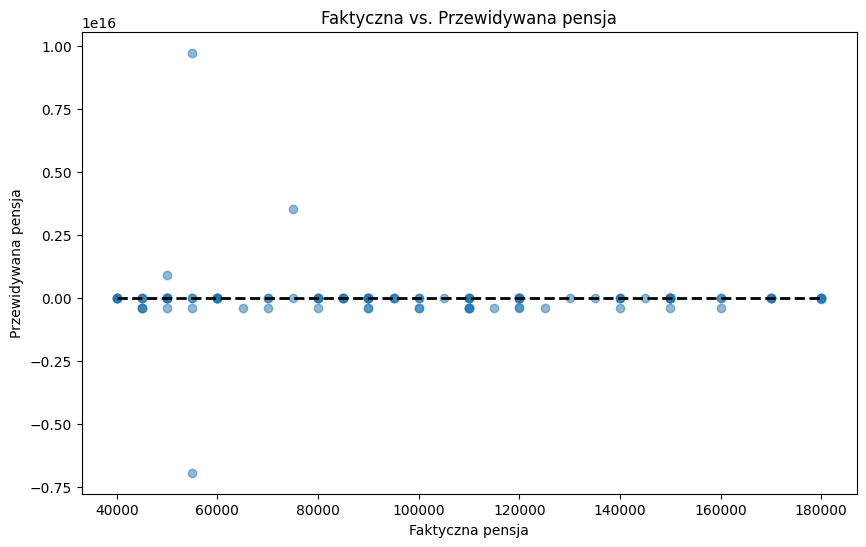

In [26]:
import matplotlib.pyplot as plt

# Tworzymy wykres rozrzutu dla faktycznych vs. przewidywanych wartości pensji
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Linia idealna
plt.xlabel('Faktyczna pensja')
plt.ylabel('Przewidywana pensja')
plt.title('Faktyczna vs. Przewidywana pensja')
plt.show()


Oczysczony kod:

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_absolute_error
import matplotlib.pyplot as plt

# Wczytywanie danych
file_path = 'Salary_Data.csv'
data = pd.read_csv(file_path)

# Oczyszczanie danych
data_cleaned = data.dropna()
salary_1st_percentile = data_cleaned['Salary'].quantile(0.01)
data_cleaned = data_cleaned[data_cleaned['Salary'] > salary_1st_percentile].copy()

# Mapowanie poziomu wykształcenia
education_level_mapping = {"Bachelor's": 1, "Master's": 2, "PhD": 3}
data_cleaned['Education Level'] = data_cleaned['Education Level'].map(education_level_mapping)

# One-hot encoding
data_encoded = pd.get_dummies(data_cleaned, columns=['Gender', 'Job Title'])

# Podział na zestaw treningowy i testowy
X = data_encoded.drop('Salary', axis=1)
y = data_encoded['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Trenowanie modelu regresji liniowej
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Ocena modelu
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
median_error = median_absolute_error(y_test, y_pred)

# Printowanie kluczowych informacji
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'Median Absolute Error: {median_error}')


MSE: 1.4802488136597884e+30
R^2: -8.616525847412279e+20
Median Absolute Error: 12541.0625


In [36]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_absolute_error

# Trenowanie modelu Huber Regressor na danych treningowych
huber_model = HuberRegressor(max_iter=1000)
huber_model.fit(X_train, y_train)


# Używamy modelu do przewidywania pensji na danych testowych
y_pred_huber = huber_model.predict(X_test)


# reszta kodu pozostaje bez zmian...

# Obliczamy błąd średniokwadratowy (MSE), współczynnik determinacji (R^2),
# medianowy błąd absolutny oraz średni błąd absolutny dla oceny modelu Huber
mse_huber = mean_squared_error(y_test, y_pred_huber)
r2_huber = r2_score(y_test, y_pred_huber)
median_error_huber = median_absolute_error(y_test, y_pred_huber)
mean_absolute_error_huber = mean_absolute_error(y_test, y_pred_huber)

# Printowanie kluczowych informacji dla Huber Regressor
print(f'MSE (Huber): {mse_huber}')
print(f'R^2 (Huber): {r2_huber}')
print(f'Median Absolute Error (Huber): {median_error_huber}')
print(f'Mean Absolute Error (Huber): {mean_absolute_error_huber}')


MSE (Huber): 213646462.2021291
R^2 (Huber): 0.8756364303902806
Median Absolute Error (Huber): 7796.857073296051
Mean Absolute Error (Huber): 10697.072026883505


podsumowując: Huber lepszy.